DESCRIPTIVE STATISTICS
              carat         depth         table         price
count  53940.000000  53940.000000  53940.000000  53940.000000
mean       0.797940     61.749405     57.457184   3932.799722
std        0.474011      1.432621      2.234491   3989.439738
min        0.200000     43.000000     43.000000    326.000000
25%        0.400000     61.000000     56.000000    950.000000
50%        0.700000     61.800000     57.000000   2401.000000
75%        1.040000     62.500000     59.000000   5324.250000
max        5.010000     79.000000     95.000000  18823.000000
T-TEST: PREMIUM vs NON-PREMIUM PRICE
T-Statistic: 22.329788675278113
p-value: 5.994317486944535e-110
CHI-SQUARE TEST: CUT vs COLOR
Chi-square Value: 310.31790052115423
p-value: 1.3945120919851853e-51
ANOVA: PRICE ~ CUT GROUP
F-Statistic: 175.6887173508061
p-value: 8.42830730759452e-150
MULTIPLE LINEAR REGRESSION
Regression Coefficients: [8348.44420783 -106.73244397  -94.41720648   76.55761977 -257.35265642
  302.389

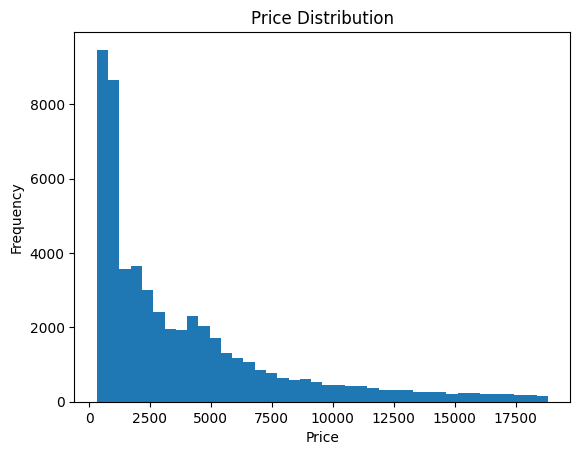

<Figure size 640x480 with 0 Axes>

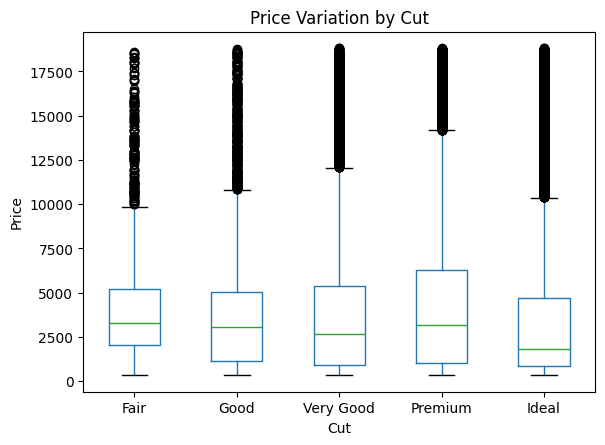

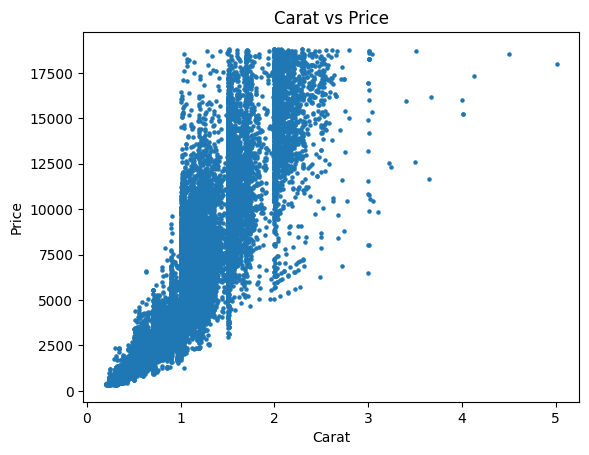

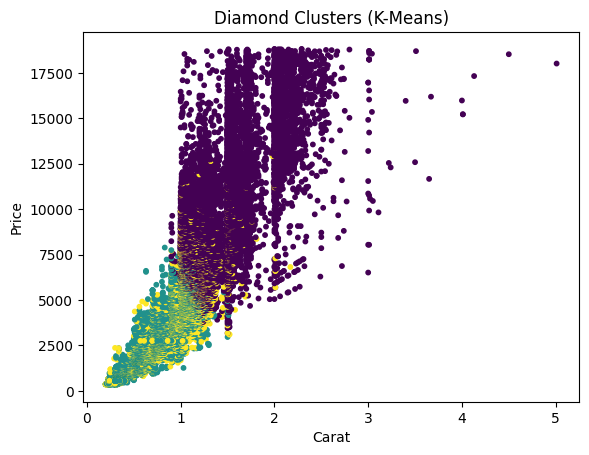

In [1]:
import pandas as pd
import numpy as np
from plotnine.data import diamonds

from scipy.stats import ttest_ind, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

data = diamonds.copy()
data.to_csv("diamonds.csv", index=False)

df = diamonds.copy()

print("DESCRIPTIVE STATISTICS")
num_cols = ["carat", "depth", "table", "price"]
print(df[num_cols].describe())

print("T-TEST: PREMIUM vs NON-PREMIUM PRICE")
premium = df[df["cut"] == "Premium"]["price"]
non_premium = df[df["cut"] != "Premium"]["price"]
t_stat, p_val = ttest_ind(premium, non_premium)
print("T-Statistic:", t_stat)
print("p-value:", p_val)

print("CHI-SQUARE TEST: CUT vs COLOR")
cont_table = pd.crosstab(df["cut"], df["color"])
chi, p, dof, exp = chi2_contingency(cont_table)
print("Chi-square Value:", chi)
print("p-value:", p)

print("ANOVA: PRICE ~ CUT GROUP")
groups = [df[df["cut"] == c]["price"] for c in df["cut"].unique()]
anova_f, anova_p = f_oneway(*groups)
print("F-Statistic:", anova_f)
print("p-value:", anova_p)

print("MULTIPLE LINEAR REGRESSION")
df_reg = df.copy()
le = LabelEncoder()
for col in ["cut", "color", "clarity"]:
    df_reg[col] = le.fit_transform(df_reg[col])

X = df_reg[["carat", "depth", "table", "cut", "color", "clarity"]]
y = df_reg["price"]

model = LinearRegression()
model.fit(X, y)

print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

print("K-MEANS CLUSTERING")
clust_df = df[["carat", "depth", "table", "price"]]
scaler = StandardScaler()
scaled = scaler.fit_transform(clust_df)

kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(scaled)

print("Cluster counts:\n", df["cluster"].value_counts())

print("FEATURE IMPORTANCE (Random Forest)")
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

plt.figure()
plt.hist(df["price"], bins=40)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df.boxplot(column="price", by="cut", grid=False)
plt.title("Price Variation by Cut")
plt.suptitle("")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

plt.figure()
plt.scatter(df["carat"], df["price"], s=5)
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

plt.figure()
plt.scatter(df["carat"], df["price"], c=df["cluster"], s=10)
plt.title("Diamond Clusters (K-Means)")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()